# Prediction Pets Adoption

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import tensorflow as tf
import random
import os
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow import keras
from sklearn.metrics import classification_report,confusion_matrix
from keras.models import Sequential
from keras.layers import Dense

In [2]:
# Set seeds for reproducibility
""" - np.random.seed(42): This line sets the seed for NumPy's random number generator.
    - tf.random.set_seed(42): This line sets the global random seed for TensorFlow.
    - random.seed(42): This line sets the seed for Python's built-in random module. 
    - os.environ['TF_DETERMINISTIC_OPS'] = '1': This line sets an environment variable to make TensorFlow operations deterministic. 
    By enabling deterministic operations, you ensure that TensorFlow will use algorithms that produce the same results every time, further enhancing reproducibility."""
np.random.seed(42)
tf.random.set_seed(42)
random.seed(42)
os.environ['TF_DETERMINISTIC_OPS'] = '1'


### ---Load data---

In [3]:
df=pd.read_csv(r'You path to the CSV file')
df

,PetID,PetType,Breed,AgeMonths,Color,Size,WeightKg,Vaccinated,HealthCondition,TimeInShelterDays,AdoptionFee,PreviousOwner,AdoptionLikelihood
0,500,Bird,Parakeet,131,Orange,Large,5.039768,1,0,27,140,0,0
1,501,Rabbit,Rabbit,73,White,Large,16.086727,0,0,8,235,0,0
2,502,Dog,Golden Retriever,136,Orange,Medium,2.076286,0,0,85,385,0,0
3,503,Bird,Parakeet,97,White,Small,3.339423,0,0,61,217,1,0
4,504,Rabbit,Rabbit,123,Gray,Large,20.498100,0,0,28,14,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2002,2502,Dog,Poodle,72,Orange,Small,27.039045,1,0,66,26,1,1
2003,2503,Rabbit,Rabbit,124,Brown,Small,4.726954,1,1,59,150,0,0
2004,2504,Rabbit,Rabbit,113,Orange,Small,1.758592,1,0,68,302,0,0
2005,2505,Dog,Labrador,12,Gray,Large,20.961592,1,0,59,478,0,0


### ---Data Cleaning---

In [4]:
df['PetType'].unique()

array(['Bird', 'Rabbit', 'Dog', 'Cat'], dtype=object)

In [5]:
df.isnull().sum()

PetID                 0
PetType               0
Breed                 0
AgeMonths             0
Color                 0
Size                  0
WeightKg              0
Vaccinated            0
HealthCondition       0
TimeInShelterDays     0
AdoptionFee           0
PreviousOwner         0
AdoptionLikelihood    0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2007 entries, 0 to 2006
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   PetID               2007 non-null   int64  
 1   PetType             2007 non-null   object 
 2   Breed               2007 non-null   object 
 3   AgeMonths           2007 non-null   int64  
 4   Color               2007 non-null   object 
 5   Size                2007 non-null   object 
 6   WeightKg            2007 non-null   float64
 7   Vaccinated          2007 non-null   int64  
 8   HealthCondition     2007 non-null   int64  
 9   TimeInShelterDays   2007 non-null   int64  
 10  AdoptionFee         2007 non-null   int64  
 11  PreviousOwner       2007 non-null   int64  
 12  AdoptionLikelihood  2007 non-null   int64  
dtypes: float64(1), int64(8), object(4)
memory usage: 204.0+ KB


In [7]:
df['PetType'].value_counts()

PetType
Dog       522
Cat       505
Rabbit    493
Bird      487
Name: count, dtype: int64

In [8]:
df['AdoptionLikelihood'].value_counts()

AdoptionLikelihood
0    1348
1     659
Name: count, dtype: int64

### ---Data Visualization---

Text(0.5, 0, 'PetType')

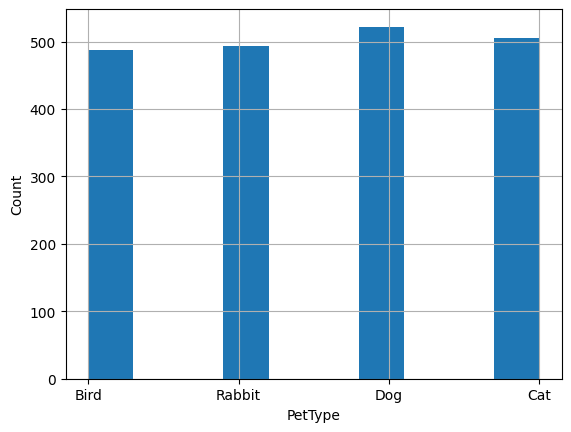

In [9]:
df.PetType.hist()
plt.ylabel('Count')
plt.xlabel('PetType')

In [10]:
content_type = df.groupby(['Breed']).size().reset_index(name='counts')
content_type

fig = px.pie(content_type, names = 'Breed',values = 'counts',color_discrete_sequence =  px.colors.sequential.Agsunset,
             title = 'Distribution of Breed',height =  700 , width = 900)
fig.show()

In [11]:
content_type = df.groupby(['PetType']).size().reset_index(name='counts')
content_type

fig = px.pie(content_type, names = 'PetType',values = 'counts',color_discrete_sequence =  px.colors.sequential.Agsunset,
             title = 'Distribution of pet type',height =  700 , width = 900)
fig.show()

Text(0.5, 0, 'Adoption Likelihood')

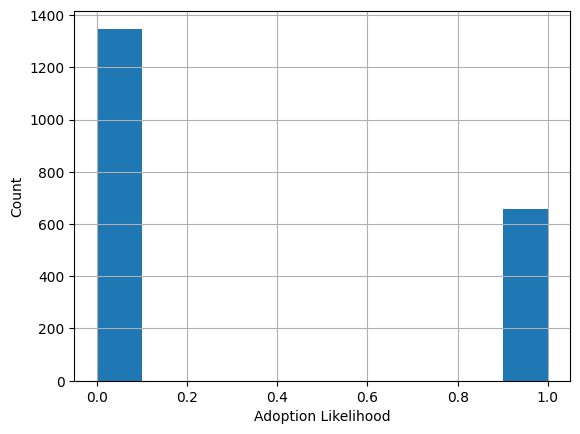

In [12]:
df.AdoptionLikelihood.hist()
plt.ylabel('Count')
plt.xlabel('Adoption Likelihood')

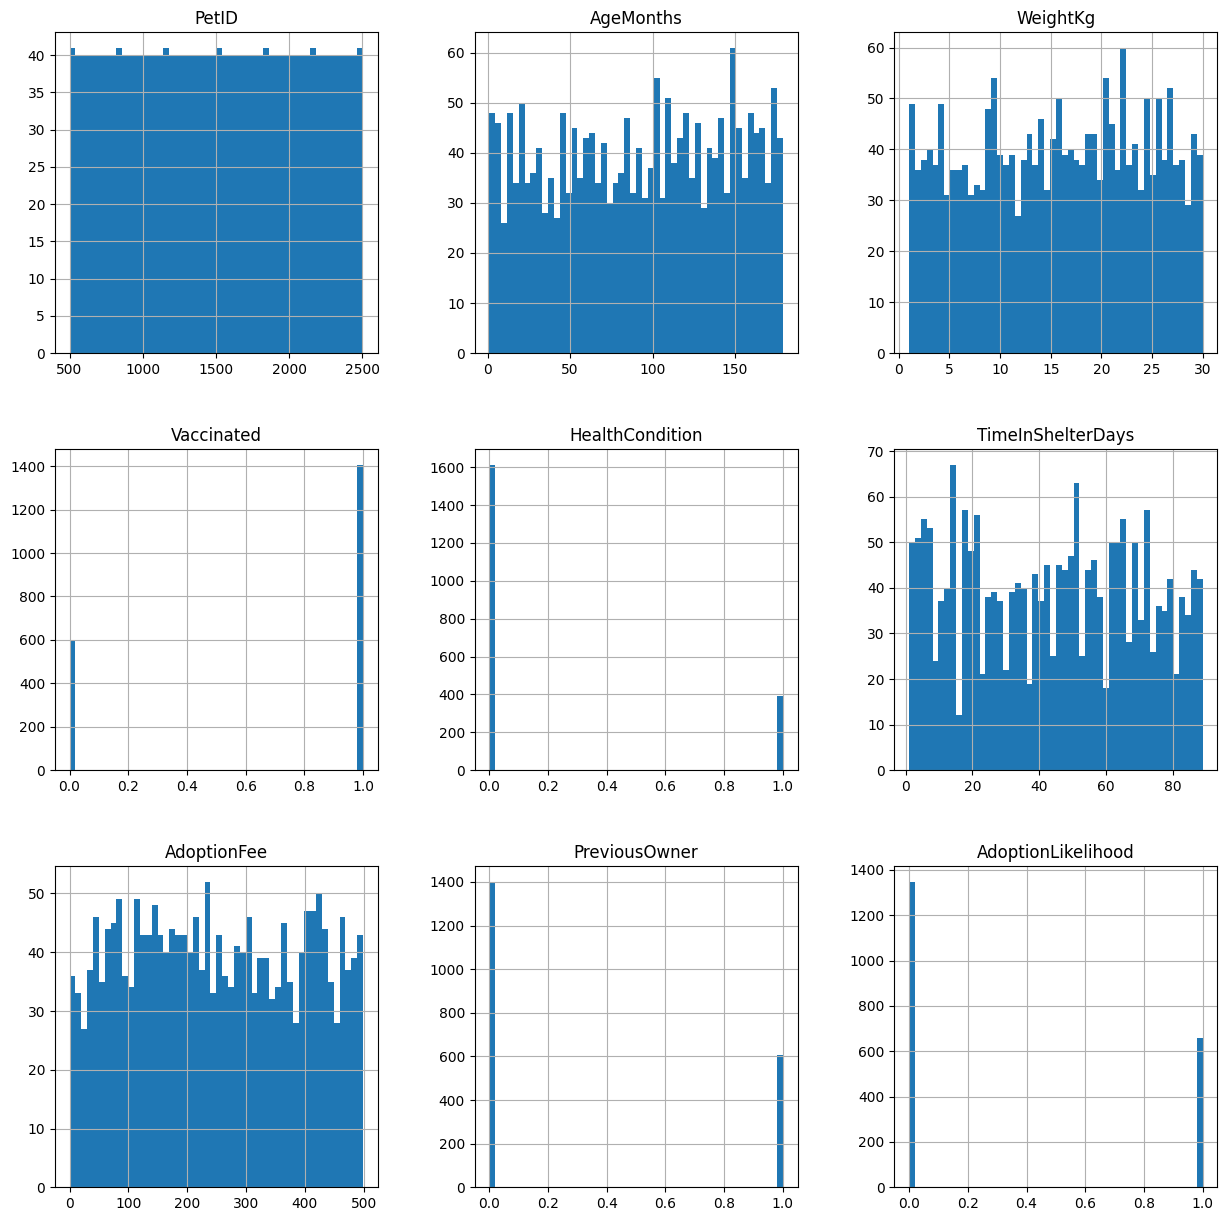

In [13]:
df.hist(bins=50,figsize=(15,15))
plt.show()

([0, 1, 2, 3],
 [Text(0, 0, 'Bird'),
  Text(1, 0, 'Rabbit'),
  Text(2, 0, 'Dog'),
  Text(3, 0, 'Cat')])

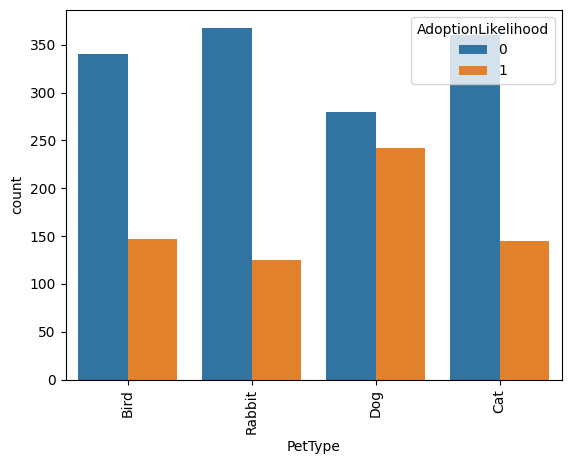

In [14]:
sns.countplot(x = df['PetType'],  hue = df['AdoptionLikelihood'])
plt.xticks(rotation=90)

## ---Feature Engineering---

In [15]:
# separate the target variable
target=df['AdoptionLikelihood']
target

0       0
1       0
2       0
3       0
4       0
       ..
2002    1
2003    0
2004    0
2005    0
2006    0
Name: AdoptionLikelihood, Length: 2007, dtype: int64

In [16]:
# remove the target variable from the data set
df=df.drop('AdoptionLikelihood', axis=1)

In [17]:
# identify categorical and numerical variables
Numerical_col=[]
Categorical_col=[]
for feature in df.columns:
    if df[feature].dtype!="object":
        Numerical_col.append(feature)
    else:
        Categorical_col.append(feature)

In [18]:
Categorical_col

['PetType', 'Breed', 'Color', 'Size']

In [19]:
# map the categorical variables petType and size into numeric values
df["PetType"]=df["PetType"].map({"Bird":0,"Rabbit":1,"Dog":2,"Cat":3})
df["Size"]=df["Size"].map({"Small":0,"Large":1,"Medium":2})

In [20]:
# convert breed and color into dummy variables
df=pd.get_dummies(df, columns=['Breed', 'Color'], drop_first=True)

In [21]:
df

,PetID,PetType,AgeMonths,Size,WeightKg,Vaccinated,HealthCondition,TimeInShelterDays,AdoptionFee,PreviousOwner,Breed_Labrador,Breed_Parakeet,Breed_Persian,Breed_Poodle,Breed_Rabbit,Breed_Siamese,Color_Brown,Color_Gray,Color_Orange,Color_White
0,500,0,131,1,5.039768,1,0,27,140,0,False,True,False,False,False,False,False,False,True,False
1,501,1,73,1,16.086727,0,0,8,235,0,False,False,False,False,True,False,False,False,False,True
2,502,2,136,2,2.076286,0,0,85,385,0,False,False,False,False,False,False,False,False,True,False
3,503,0,97,0,3.339423,0,0,61,217,1,False,True,False,False,False,False,False,False,False,True
4,504,1,123,1,20.498100,0,0,28,14,1,False,False,False,False,True,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2002,2502,2,72,0,27.039045,1,0,66,26,1,False,False,False,True,False,False,False,False,True,False
2003,2503,1,124,0,4.726954,1,1,59,150,0,False,False,False,False,True,False,True,False,False,False
2004,2504,1,113,0,1.758592,1,0,68,302,0,False,False,False,False,True,False,False,False,True,False
2005,2505,2,12,1,20.961592,1,0,59,478,0,True,False,False,False,False,False,False,True,False,False


In [22]:
# make sure that the columns of the list are of type integer
List=["Breed_Labrador","Breed_Parakeet","Breed_Persian","Breed_Poodle","Breed_Siamese","Breed_Rabbit","Color_Brown",
     "Color_Gray","Color_Orange","Color_White"]
df[List]=df[List].astype(int)

In [23]:
df

,PetID,PetType,AgeMonths,Size,WeightKg,Vaccinated,HealthCondition,TimeInShelterDays,AdoptionFee,PreviousOwner,Breed_Labrador,Breed_Parakeet,Breed_Persian,Breed_Poodle,Breed_Rabbit,Breed_Siamese,Color_Brown,Color_Gray,Color_Orange,Color_White
0,500,0,131,1,5.039768,1,0,27,140,0,0,1,0,0,0,0,0,0,1,0
1,501,1,73,1,16.086727,0,0,8,235,0,0,0,0,0,1,0,0,0,0,1
2,502,2,136,2,2.076286,0,0,85,385,0,0,0,0,0,0,0,0,0,1,0
3,503,0,97,0,3.339423,0,0,61,217,1,0,1,0,0,0,0,0,0,0,1
4,504,1,123,1,20.498100,0,0,28,14,1,0,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2002,2502,2,72,0,27.039045,1,0,66,26,1,0,0,0,1,0,0,0,0,1,0
2003,2503,1,124,0,4.726954,1,1,59,150,0,0,0,0,0,1,0,1,0,0,0
2004,2504,1,113,0,1.758592,1,0,68,302,0,0,0,0,0,1,0,0,0,1,0
2005,2505,2,12,1,20.961592,1,0,59,478,0,1,0,0,0,0,0,0,1,0,0


In [24]:
# standardize the data
scaler=StandardScaler()
x=scaler.fit_transform(df)
x

array([[-1.73118802, -1.36664934,  0.74269116, ..., -0.49890983,
         1.97663615, -0.51444172],
       [-1.72946201, -0.46793858, -0.36979735, ..., -0.49890983,
        -0.50591   ,  1.94385479],
       [-1.727736  ,  0.43077217,  0.83859535, ..., -0.49890983,
         1.97663615, -0.51444172],
       ...,
       [ 1.727736  , -0.46793858,  0.39743611, ..., -0.49890983,
         1.97663615, -0.51444172],
       [ 1.72946201,  0.43077217, -1.53982838, ...,  2.00437023,
        -0.50591   , -0.51444172],
       [ 1.73118802, -0.46793858,  0.64678698, ..., -0.49890983,
        -0.50591   ,  1.94385479]])

In [25]:
# split the data for training and testing
X_train,X_test,y_train,y_test=train_test_split(x,target,test_size=0.2, random_state=42)

In [26]:
len(X_train)

1605

In [27]:
len(X_test)

402

### ---Build Model---

In [28]:
# create a neural network model with several dense layers
model_ANN=keras.Sequential([
    keras.layers.Dense(20,input_shape=(20,),activation='relu'),
    keras.layers.Dense(50, activation='relu'),
    keras.layers.Dense(20, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
    
])

model_ANN.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy']
)
# train the model with 50 epochs
model_ANN.fit(X_train,y_train,epochs=50)

Epoch 1/50


c:\Users\leo21\Desktop\Upgrade_hub\mi_entorno\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5131 - loss: 0.7001
Epoch 2/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7548 - loss: 0.5148
Epoch 3/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8376 - loss: 0.4059
Epoch 4/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8652 - loss: 0.3508
Epoch 5/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8786 - loss: 0.3225
Epoch 6/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8848 - loss: 0.3024
Epoch 7/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8880 - loss: 0.2857
Epoch 8/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8954 - loss: 0.2705
Epoch 9/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8993 - loss: 0.2568
Epoch 10/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9016 - loss: 0.2443
Epoch 11/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9079 - loss: 0.2328
Epoch 12/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9123 - loss: 0.2218


In [29]:
model_ANN.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 20)             │           420 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 50)             │         1,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 20)             │         1,020 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            21 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,535 (29.44 KB)

 Trainable params: 2,511 (9.81 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 5,024 (19.63 KB)

### ---Evaluation---

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.92      0.91       270
           1       0.83      0.81      0.82       132

    accuracy                           0.88       402
   macro avg       0.87      0.86      0.87       402
weighted avg       0.88      0.88      0.88       402



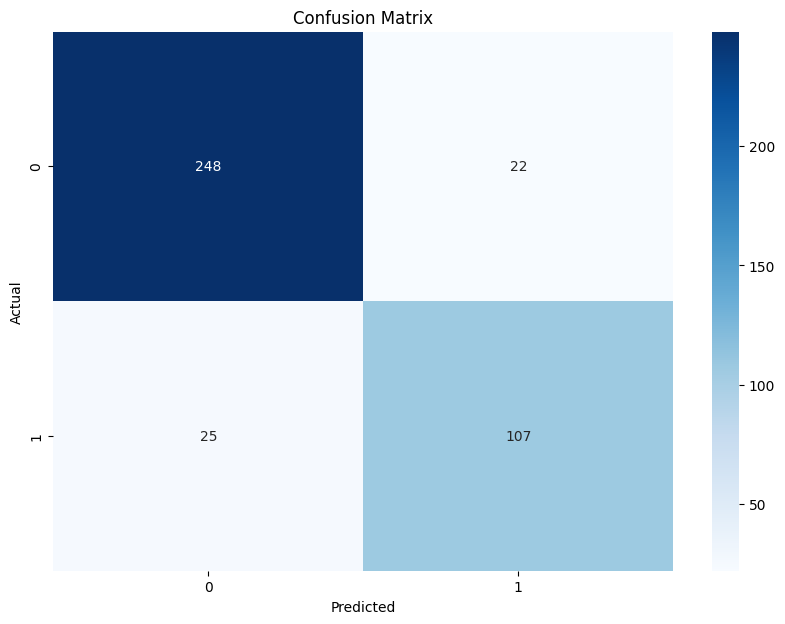

In [30]:
def evaluate_model(model_ANN, X_test, y_test):
    # Predictions
    y_pred = model_ANN.predict(X_test)
    y_pred = (y_pred > 0.5)
    
    # Classification report
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    
    # confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

# Evaluate the model
evaluate_model(model_ANN, X_test, y_test)

## Conclusions

Breakdown of the Confusion Matrix:
- 248 (True Negatives): The model correctly predicted 248 instances of class 0.
- 22 (False Positives): The model incorrectly predicted 22 instances of class 0 as class 1.
- 25 (False Negatives): The model incorrectly predicted 25 instances of class 1 as class 0.
- 107 (True Positives): The model correctly predicted 107 instances of class 1.

Conclusions:
- Global Precision: The model has a global precision of 88% (accuracy), which means that 88% of the predictions were correct.

Class 0:
- Accuracy: 0.91 (91% of class 0 predictions were correct).
- Recall: 0.92 (92% of real instances of class 0 were correctly identified).

Class 1:
- Accuracy: 0.83 (83% of class 1 predictions were correct).
- Recall: 0.81 (81% of the real instances of class 1 were correctly identified).

F1-Score:
- Class 0: 0.91
- Class 1: 0.82

Observations:
- Class 0: The model has very good performance in class 0, with high precision and recall.
- Class 1: Although the performance is slightly lower in class 1, it is still quite good with a precision of 83% and a recall of 81%.

General conclusion:
The artificial neural network (ANN) model used for pet adoption prediction has strong performance, especially in class 0. Although there is room for improvement in class 1, the overall results are positive, with high precision and recall. in both classes. This suggests that the model is effective in correctly predicting most instances in both classes.